## Alexa Sentiment Analysis
---

### Loading Packages and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import string
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
warnings.simplefilter('ignore')
sns.set(style="white", palette="muted", color_codes=True)

### Loading dataset

Dataset Source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/data

In [2]:
dataset = pd.read_csv('C:\\Users\\c-shehzadaa\\Downloads\\Amazon Alexa Dataset\\amazon_alexa.tsv',sep='\t')
dataset.dropna(inplace =True)
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
dataset.shape

(3150, 5)

#### Data Visualization

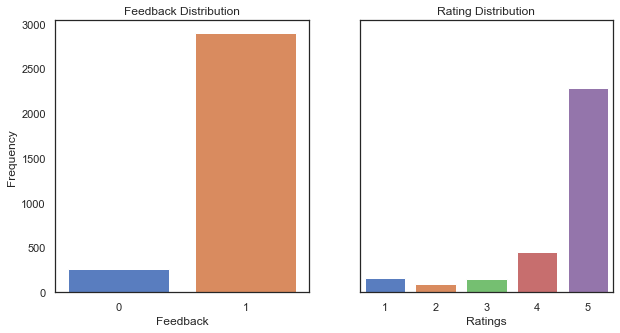

In [4]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
ax[0].set_title('Feedback Distribution')
ax[1].set_title('Rating Distribution')
sns.countplot(dataset['feedback'],ax=ax[0])
sns.countplot(dataset['rating'],ax=ax[1])
ax[0].set_xlabel('Feedback')
ax[1].set_xlabel('Ratings')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('')
plt.show()

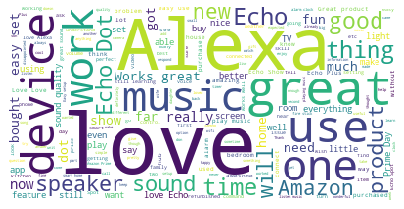

In [5]:
from wordcloud import WordCloud
word = dataset['verified_reviews'].tolist()
word_string = ' '.join(word)
plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(WordCloud(background_color='white').generate(word_string))
plt.show()

#### Text Preprocessing

In [6]:
def text_cleaning(text):
    lemmatizer = WordNetLemmatizer()
    lemmatizer.lemmatize('cats',pos='v')
    text = [lemmatizer.lemmatize(word,pos='a').lower() for word in text.split() if word not in stopwords.words('english')+list(string.punctuation) ]
    return ' '.join(text)

In [7]:
dataset['verified_reviews_clean'] = dataset['verified_reviews'].apply(lambda x: text_cleaning(x))

In [8]:
reviews = dataset['verified_reviews']
feedback = dataset['feedback']
countvect = CountVectorizer()
review_vectorize = countvect.fit_transform(reviews)
review_tfidf_vectorize = TfidfTransformer().fit_transform(review_vectorize)

In [9]:
Xtrain_Vect, Xtest_Vect, ytrain_Vect, ytest_Vect = train_test_split(review_vectorize,feedback,test_size=0.2,random_state=45)

In [10]:
Xtrain_Vect_Tf, Xtest_Vect_Tf, ytrain_Vect_Tf, ytest_Vect_Tf = train_test_split(review_tfidf_vectorize,feedback,test_size=0.2,random_state=45)

#### Naive Bayes

In [16]:
#Count vectorizer
nb = MultinomialNB()
nb.fit(Xtrain_Vect,ytrain_Vect)
y_pred_vect = nb.predict(Xtest_Vect)
print(classification_report(ytest_Vect,y_pred_vect))
print(f'Accuracy Score:{accuracy_score(ytest_Vect,y_pred_vect)}')
print(f'AUC ROC Score:{roc_auc_score(ytest_Vect,y_pred_vect)}')

              precision    recall  f1-score   support

           0       0.71      0.29      0.42        51
           1       0.94      0.99      0.96       579

   micro avg       0.93      0.93      0.93       630
   macro avg       0.83      0.64      0.69       630
weighted avg       0.92      0.93      0.92       630

Accuracy Score:0.9333333333333333
AUC ROC Score:0.6418774763791526


In [47]:
feature = countvect.get_feature_names()
max_coef = sorted(enumerate(nb.coef_.ravel()),key=lambda x: x[1],reverse=True)
feature_contrib = [feature[x[0]] for x in max_coef[:20]]

In [48]:
feature_contrib

['it',
 'love',
 'the',
 'to',
 'great',
 'and',
 'my',
 'works',
 'is',
 'for',
 'echo',
 'easy',
 'this',
 'with',
 'product',
 'use',
 'so',
 'like',
 'alexa',
 'up']

In [43]:
enumerate(nb.coef_.ravel())

In [44]:
#TFIDF vectorizer
nb = MultinomialNB()
nb.fit(Xtrain_Vect_Tf,ytrain_Vect_Tf)
y_pred_vect_tf = nb.predict(Xtest_Vect_Tf)
print(classification_report(ytest_Vect_Tf,y_pred_vect_tf))
print(f'Accuracy Score:{accuracy_score(ytest_Vect_Tf,y_pred_vect_tf)}')
print(f'AUC ROC Score:{roc_auc_score(ytest_Vect_Tf,y_pred_vect_tf)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.92      1.00      0.96       579

   micro avg       0.92      0.92      0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.92      0.88       630

Accuracy Score:0.919047619047619
AUC ROC Score:0.5


#### SVM

In [14]:
#Count vectorizer
svm = SVC()
svm.fit(Xtrain_Vect,ytrain_Vect)
y_pred_vect_svm = svm.predict(Xtest_Vect)
print(classification_report(ytest_Vect,y_pred_vect_svm))
print(f'Accuracy Score:{accuracy_score(ytest_Vect,y_pred_vect_svm)}')
print(f'AUC ROC Score:{roc_auc_score(ytest_Vect,y_pred_vect_svm)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.92      1.00      0.96       579

   micro avg       0.92      0.92      0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.92      0.88       630

Accuracy Score:0.919047619047619
AUC ROC Score:0.5


In [15]:
#TFIDF vectorizer
svm.fit(Xtrain_Vect_Tf,ytrain_Vect_Tf)
y_pred_vect_tf_svm = svm.predict(Xtest_Vect_Tf)
print(classification_report(ytest_Vect_Tf,y_pred_vect_tf_svm))
print(f'Accuracy Score:{accuracy_score(ytest_Vect_Tf,y_pred_vect_tf_svm)}')
print(f'AUC ROC Score:{roc_auc_score(ytest_Vect_Tf,y_pred_vect_tf_svm)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.92      1.00      0.96       579

   micro avg       0.92      0.92      0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.92      0.88       630

Accuracy Score:0.919047619047619
AUC ROC Score:0.5


### Deep Learning